In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import neuraltda.stimulus_space as sc
import neuraltda.spectralAnalysis as sa
import pandas as pd
import h5py as h5
import pickle
import networkx as nx
from sklearn.manifold import MDS

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20180416/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
dtovr = 0
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'StimSpace2'             # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# computation parameters
thresh = 4.0

In [3]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-0_seg-0-0-StimSpace2/20180411T165022Z-10.0-0.binned
Data Not already binned
Nreps = 20
skip = 312
dur = 206722.0
nwins = 663
Nreps = 20
skip = 312
dur = 206723.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206722.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206718.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 2

In [46]:
# select bird
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 0
block_path = bps[bird]
bdf = bdfs[bird]
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    popmat = poptens[:, :, trial]



['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung', 'E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung', 'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung', 'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung']


In [53]:
print(popmat.shape )
t = np.arange(0, 6, 0.01)
t.shape

(54, 663)


(600,)

In [ ]:
au = sc.binnedtobinary(popmat, thresh)
maxsimps = sc.binarytomaxsimplex(au, rDup=True)


In [ ]:
g = sc.stimspacegraph_nx(maxsimps, ncells)
nx.info(g)

In [ ]:
dmat = nx.floyd_warshall_numpy(g)

In [ ]:
gmds = MDS(n_jobs=-2, dissimilarity='precomputed')
embed_pts = gmds.fit_transform(dmat)

In [ ]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(7,7))
plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')

In [ ]:
# select bird
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 1
block_path = bps[bird]
bdf = bdfs[bird]
d_max = 30
dmats = []
graphs = []
noise_pc = 0.005
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    for trial in range(ntrials):
        popmat = poptens[:, :, trial]
        au = sc.binnedtobinary(popmat, thresh)
        maxsimps = sc.binarytomaxsimplex(au, rDup=True)
        print('computing graph...')
        g = sc.stimspacegraph_nx(maxsimps, ncells)
        graphs.append(g)
        nx.info(g)
        print('computing distances...')
        dmat = nx.floyd_warshall_numpy(g)
        noise_amps = noise_pc*dmat
        noise = np.multiply(noise_amps, np.random.randn(dmat.shape[0], dmat.shape[1])) 
        noise = (noise + noise.T)/2
        dmat += noise
        dmats.append(dmat)
        #Adjust inf dists
        dmat[np.isnan(dmat)] = d_max
        print('computing mds...')
        gmds = MDS(n_jobs=-2, dissimilarity='precomputed', metric=False)
        embed_pts = gmds.fit_transform(dmat)
        plt.figure()
        plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
        fig = plt.figure(figsize=(7,7))
        plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')
        plt.show()

In [ ]:
G = graphs[0]
nx.info(G)
nx.is_connected(G)
G.edges((10,31), data=True)

ns = list(G.nodes())

cn = [(x,) for x in range(101)]
dmat = np.zeros((len(cn), len(cn)))
for ind in range(len(cn)):
    for indw in range(ind+1, len(cn)):
        try:
            dmat[ind, indw] = nx.shortest_path_length(G, ns[ind], ns[indw], weight='weight')
        except ValueError:
            print(ns[ind], ns[indw])

In [ ]:
dmat = dmat + dmat.T

In [ ]:
gmds = MDS(n_jobs=-2, dissimilarity='precomputed')
embed_pts = gmds.fit_transform(dmat)
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(7,7))
plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')

In [ ]:
nx.shortest_path_length(G, (4,28), (4,), weight='weight')

In [ ]:
nx.negative_edge_cycle(G)

In [ ]:
G.edges(data=True)

In [ ]:
# do everything
allmaxsimps = []
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    stims = list(f.keys())
    for stim in stims:
        poptens = np.array(f[stim]['pop_tens'])
        ncells = 2*poptens.shape[0]
        ntrials = poptens.shape[2]
        for trial in range(ntrials):
            popmat = poptens[:, :, trial]
            au = sc.binnedtobinary(popmat, thresh)
            maxsimps = sc.binarytomaxsimplex(au, rDup=True)
            allmaxsimps.append(maxsimps)

In [ ]:
ams = np.concatenate(allmaxsimps)
g = sc.stimspacegraph_nx(ams, ncells)

In [ ]:
# metric version
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 1
block_path = bps[bird]
bdf = bdfs[bird]
d_max = 30
dmats = []
graphs = []
noise_pc = 0.005
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    for trial in range(ntrials):
        popmat = poptens[:, :, trial]
        au = sc.binnedtobinary(popmat, thresh)
        maxsimps = sc.binarytomaxsimplex(au, rDup=True)
        print('computing graph...')
        g = sc.stimspacegraph_nx(maxsimps, ncells)
        graphs.append(g)
        nx.info(g)
        print('computing distances...')
        dmat = nx.floyd_warshall_numpy(g)
        noise_amps = noise_pc*dmat
        noise = np.multiply(noise_amps, np.random.randn(dmat.shape[0], dmat.shape[1])) 
        noise = (noise + noise.T)/2
        dmat += noise
        dmats.append(dmat)
        #Adjust inf dists
        dmat[np.isnan(dmat)] = d_max
        print('computing mds...')
        gmds = MDS(n_jobs=-2, dissimilarity='precomputed', metric=True)
        embed_pts = gmds.fit_transform(dmat)
        plt.figure()
        plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
        fig = plt.figure(figsize=(7,7))
        plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')
        plt.show()

In [ ]:
# metric version
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 1
block_path = bps[bird]
bdf = bdfs[bird]
d_max = 30
dmats = []
graphs = []
noise_pc = 0.005
res = []
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    for trial in range(ntrials):
        popmat = poptens[:, :, trial]
        au = sc.binnedtobinary(popmat, thresh)
        maxsimps = sc.binarytomaxsimplex(au, rDup=True)
        print('computing graph...')
        g = sc.stimspacegraph_nx(maxsimps, ncells)
        sorted_node_list = sorted(list(g.nodes()), key=len)
        graphs.append(g)
        nx.info(g)
        print('computing distances...')
        dmat = nx.floyd_warshall_numpy(g, nodelist=sorted_node_list)
        noise_amps = noise_pc*dmat
        noise = np.multiply(noise_amps, np.random.randn(dmat.shape[0], dmat.shape[1])) 
        noise = (noise + noise.T)/2
        dmat += noise
        dmats.append(dmat)
        #Adjust inf dists
        dmat[np.isnan(dmat)] = d_max
        print('computing mds...')
        gmds = MDS(n_jobs=-2, dissimilarity='precomputed', metric=True)
        embed_pts = gmds.fit_transform(dmat)
        
        res.append([g, sorted_node_list, dmat, embed_pts])
        
        fig = plt.figure(figsize=(9,9))
        orders = np.array([len(x) for x in sorted_node_list])
        max_ord = max(orders)
        for order in range(max_ord):
            inds = (orders == order+1)

            plt.plot(embed_pts[inds, 0], embed_pts[inds, 1], '.', label=order+1)

        plt.legend()
        plt.show()

In [191]:
from scipy.io import wavfile
from scipy.signal import spectrogram
stimname = 'I_scaled_burung'
stimfile = '/home/brad/krista_stims/I_40k.wav'

fs, stimdat = wavfile.read(stimfile)
print(fs)

winlen = 10 # ms
winlen_samps = int(winlen*fs/1000.)
#winlen_samps = 256
winlen_samps = 128
nfft = 128
noverlap = int(winlen_samps/2)
nt_win = 5
ovr = np.round(winlen_samps*pcover, )
f, t, Sxx = spectrogram(stimdat, fs, nperseg=winlen_samps, noverlap=ovr)

def downsample_freq(dat):
    return (dat[1::2, :] + dat[:-1:2, :])/2

def downsample_t(dat):
    if len(dat.shape) == 1:
        return (dat[1::2] + dat[:-1:2])/2
    return (dat[:, 1::2] + dat[:, :-1:2])/2

avgSxx = downsample_freq(downsample_freq(downsample_freq(Sxx)))
avgSxx = downsample_t(downsample_t(avgSxx))
t = downsample_t(downsample_t(t))
#t = t[::3]
avgSxx = np.log10(avgSxx)
avgSxx = avgSxx - np.tile(np.mean(avgSxx, axis=1)[:, np.newaxis], (1, avgSxx.shape[1]))
avgSxx = np.divide(avgSxx, np.tile(np.std(avgSxx, axis=1)[:, np.newaxis], (1, avgSxx.shape[1])))
stim = np.zeros((nt_win*avgSxx.shape[0], avgSxx.shape[1]))
for win in range(nt_win, avgSxx.shape[1]):
    stim[:, win] = np.reshape(avgSxx[:, win-nt_win:win], (nt_win*avgSxx.shape[0]))


40000


In [192]:
avgSxx.shape

(8, 468)

In [165]:
# Extract relevant data
from ephys import core, events

bp = bps['B1056']

spikes = core.load_spikes(bp)
fs_spikes = core.load_fs(bp)
trials = events.load_trials(bp)
clusters = core.load_clusters(bp)

# Extract trials from given stimulus
stim_trials = trials[trials['stimulus'] == stimname]

# get segment times for trial of interest
trial = 0

#
trial_bounds = (stim_trials.iloc[trial]['time_samples'], stim_trials.iloc[trial]['stimulus_end'])
clusters_to_use = clusters[clusters['quality'] == 'Good']
clusters_list = clusters_to_use['cluster'].unique()
spikes = spikes[spikes['cluster'].isin(list(clusters_list))]
segment = tp2.get_segment((0, trial_bounds[1]-trial_bounds[0]), fs_spikes, [0,0])
nclus = len(clusters_list)

# convert time to samples:
t_samp = t*fs_spikes

In [166]:
# get the population tensor
poptens = tp2.build_poptens_given_windows(stim_trials, spikes, t_samp, clusters_list, segment)

In [168]:
np.sum(poptens[:, :, 0], axis=0)
#print(poptens.shape)

array([ 0.,  0.,  2.,  9.,  2.,  5.,  5.,  3.,  5.,  4.,  3.,  2.,  2.,
        2.,  3.,  1.,  3.,  5.,  4.,  3.,  4.,  5.,  5.,  1.,  4.,  6.,
        2.,  2.,  2.,  3.,  2.,  2.,  1.,  5.,  2.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  1.,  7.,  4.,  1.,  3.,  3.,  3.,  0.,  4.,
        2.,  3.,  3.,  1.,  4.,  4.,  5.,  2.,  1.,  3.,  3.,  2.,  0.,
        3.,  0.,  1.,  2.,  0.,  2.,  3.,  4.,  2.,  4.,  2.,  4.,  1.,
        6.,  5.,  3.,  1.,  2.,  2.,  2.,  1.,  3.,  2.,  1.,  6.,  5.,
        3.,  6.,  3.,  2.,  6.,  0.,  8.,  4.,  5.,  4.,  4.,  4.,  3.,
        4.,  5.,  0.,  2.,  4.,  6.,  3.,  4.,  3.,  4.,  3.,  2.,  2.,
        2.,  2.,  1.,  3.,  1.,  0.,  0.,  5.,  1.,  2.,  0.,  3.,  4.,
        1.,  1.,  1.,  4.,  3.,  3.,  1.,  1.,  0.,  0.,  2.,  3.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  1.,  2.,  1.,  0.,
        3.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  2.,
        3.,  0.,  0.,  3.,  4.,  2.,  3.,  2.,  1.,  0.,  2.,  0

In [172]:
reload(sc)
dmats = []
graphs = []
noise_pc = 0.005
res = []
ncells = 2*poptens.shape[0]
ntrials = poptens.shape[2]
for trial in range(5):
    popmat = poptens[:, :, trial]
    au = sc.binnedtobinary(popmat, thresh)
    maxsimps = sc.binarytomaxsimplex(au, rDup=False)
    print('computing graph...')
    print(len(maxsimps))
    g = sc.stimspacegraph_nx(maxsimps, ncells)
    graphs.append((g, maxsimps, au))
    print(nx.info(g))
#     print('computing distances...')
#     dmat = nx.floyd_warshall_numpy(g)
#     noise_amps = noise_pc*dmat
#     noise = np.multiply(noise_amps, np.random.randn(dmat.shape[0], dmat.shape[1])) 
#     noise = (noise + noise.T)/2
#     dmat += noise
#     dmats.append(dmat)
#     #Adjust inf dists
#     #dmat[np.isnan(dmat)] = d_max
#     print('computing mds...')
#     gmds = MDS(n_jobs=-2, dissimilarity='precomputed', metric=True)
#     embed_pts = gmds.fit_transform(dmat)
#     plt.figure()
#     plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
#     fig = plt.figure(figsize=(7,7))
#     plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')
#     plt.show()

computing graph...
369
Name: 
Type: Graph
Number of nodes: 1500
Number of edges: 4882
Average degree:   6.5093
computing graph...
351
Name: 
Type: Graph
Number of nodes: 969
Number of edges: 2814
Average degree:   5.8080
computing graph...
357
Name: 
Type: Graph
Number of nodes: 1549
Number of edges: 5350
Average degree:   6.9077
computing graph...
338
Name: 
Type: Graph
Number of nodes: 704
Number of edges: 1867
Average degree:   5.3040
computing graph...
340
Name: 
Type: Graph
Number of nodes: 941
Number of edges: 2866
Average degree:   6.0914


In [193]:
g = graphs[trial][0]
maxsimps = graphs[trial][1]
binmat = graphs[trial][2]

(embed_pts, dmat, sorted_node_list) = sc.mds_embed(g)
print("preparing data...")
(x, y) = sc.prepare_affine_data(binmat, stim, embed_pts, sorted_node_list)
L = lambda a: sc.affine_loss(a, x, y, stim.shape[0], 2)
L_jac = lambda a: sc.affine_loss_jac(a, x, y, stim.shape[0], 2)

preparing data...


In [195]:
from scipy.optimize import fmin, minimize
#print(fmin(L, np.random.randn(stim.shape[0]*2+stim.shape[0]), maxfun=1e6, full_output=True))

minout = minimize(L, np.random.randn(stim.shape[0]*2+stim.shape[0]), method='BFGS', jac= L_jac)
# map all the MDS points to original space
# A = np.array([[a_min[0], a_min[1]], [a_min[2], a_min[3]]])
# b = np.array([a_min[4], a_min[5]])
# y_embed = np.dot(A, embed_pts.T) + np.tile(b[:, np.newaxis], (1, np.shape(embed_pts)[0]))

# fig0 = plt.figure(figsize=(9,9))
# plt.plot(embed_pts[:, 0], embed_pts[:, 1], '.')

# fig = plt.figure(figsize=(9,9))
# plot_environment(envs[env_num], fields, sigma)
# plt.plot(y_embed[0, :], y_embed[1, :], '.')
print(minout)

      fun: 6236.47918591017
 hess_inv: array([[ 9.53181989e-01,  1.56654578e-03,  5.29893776e-03, ...,
         1.87882489e-02, -2.33699012e-03,  2.12396923e-02],
       [ 1.56654578e-03,  9.68894945e-01, -1.10062909e-02, ...,
        -1.67988818e-02,  6.83683171e-03,  3.70462174e-04],
       [ 5.29893776e-03, -1.10062909e-02,  9.89382540e-01, ...,
        -1.86209623e-02,  6.38648764e-04, -6.70050450e-03],
       ...,
       [ 1.87882489e-02, -1.67988818e-02, -1.86209623e-02, ...,
         9.53019585e-01, -5.04368923e-03, -7.06667071e-03],
       [-2.33699012e-03,  6.83683171e-03,  6.38648764e-04, ...,
        -5.04368923e-03,  9.92395165e-01,  6.65845141e-03],
       [ 2.12396923e-02,  3.70462174e-04, -6.70050450e-03, ...,
        -7.06667071e-03,  6.65845141e-03,  9.75527545e-01]])
      jac: array([-1.07562232e-06, -1.36899826e-06, -4.12572284e-07,  4.39981761e-07,
       -1.43371718e-07, -1.15434654e-06,  4.72759607e-07, -4.39473869e-07,
       -2.49180712e-06,  2.31298728e-07, -1

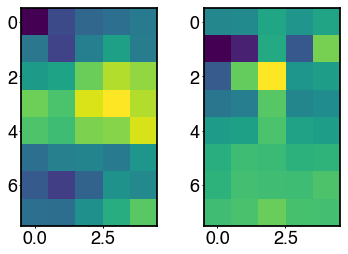

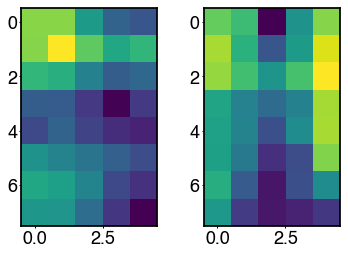

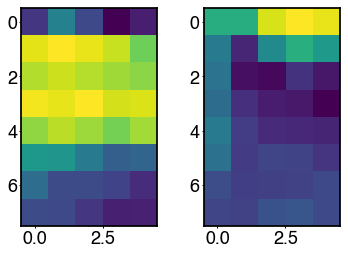

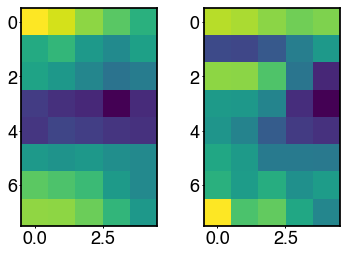

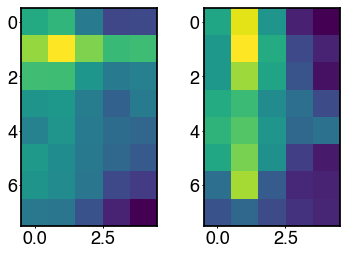

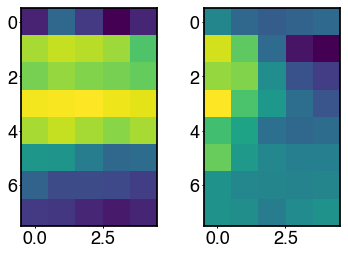

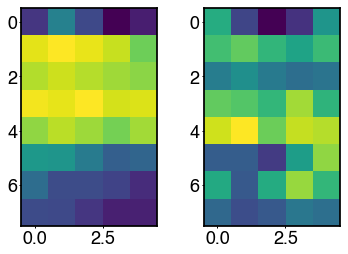

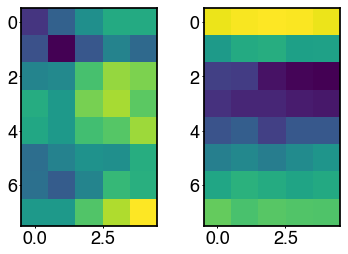

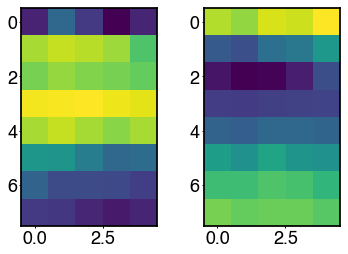

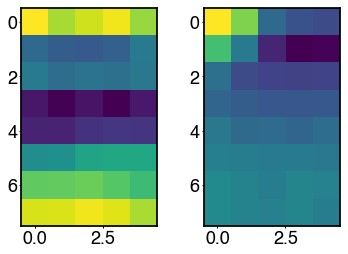

In [197]:
affine = minout['x']

reconstructed = sc.affine_transform(affine, x, stim.shape[0], 2)

nexamples = 10
exemplar_inds = np.random.choice(reconstructed.shape[1], size=nexamples)

r_exemplars = reconstructed[:, exemplar_inds]
true_exemplars = stim[:, exemplar_inds]

for ex in range(nexamples):
    r = np.reshape(r_exemplars[:, ex], (int(stim.shape[0]/nt_win), nt_win))
    t = np.reshape(true_exemplars[:, ex], (int(stim.shape[0]/nt_win), nt_win))
    fig = plt.figure()
    fig.add_subplot(121)
    ax = plt.gca()
    plt.imshow(r)
    fig.add_subplot(122)
    plt.imshow(t)

In [186]:
stim.shape[0]

40

In [103]:
reload(sc)
testL = lambda a: sc.affine_loss(a, testx, testy, 2, 2)
testL_jac = lambda a: sc.affine_loss_jac(a, testx, testy, 2,2)

In [105]:
minimize(testL, [1,0,0,1,0,0], method='BFGS', jac=testL_jac)

      fun: 9.226203141631617e-21
 hess_inv: array([[ 0.82849541, -0.0627481 ,  0.09992566,  0.30970062, -0.16155164,
        -0.03162954],
       [-0.0627481 ,  0.66982943,  0.30970071,  0.02226262, -0.00350908,
         0.33364659],
       [ 0.09992566,  0.30970071,  0.19442092,  0.06867503, -0.03162966,
         0.1668272 ],
       [ 0.30970062,  0.02226262,  0.06867503,  0.35770708,  0.3336465 ,
         0.00765001],
       [-0.16155164, -0.00350908, -0.03162966,  0.3336465 ,  0.82621517,
        -0.02338488],
       [-0.03162954,  0.33364659,  0.1668272 ,  0.00765001, -0.02338488,
         0.19529593]])
      jac: array([ 4.16941585e-10,  2.57550194e-10, -9.22448920e-11, -4.62042823e-10,
       -2.79593904e-10,  6.03380540e-10])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([ 2.00000000e+00,  3.00000000e+00, -6.00000000e+00,  1.00000000e+00,
       -2.74824608e-12,  1.05791487e-11])

In [104]:
testL_jac([1,0,0,1,0,0])

array([ -21.66882108, -108.21500405,  289.5710207 ,  -53.18603141,
         26.14655289,  -60.77875526])

In [108]:
stim.shape

(50, 600)